In [243]:
# Install the required libraries
!pip install prophet

In [244]:
# Import the required libraries and dependencies
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import statistics as stats
%matplotlib inline

In [245]:
# Store the data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
).dropna()

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

<ipython-input-245-217fb1a948ac>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [246]:
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


,Search Trends
Date,
2020-05-01 00:00:00,80
2020-05-01 01:00:00,80
2020-05-01 02:00:00,76
2020-05-01 03:00:00,66
2020-05-01 04:00:00,53
...,...
2020-05-31 19:00:00,59
2020-05-31 20:00:00,64
2020-05-31 21:00:00,76


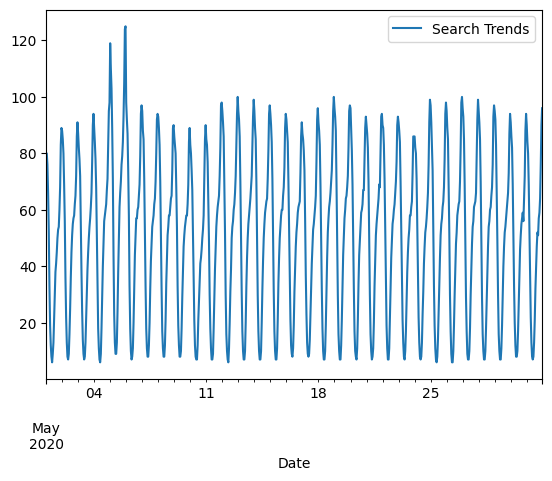

In [247]:
# Slice the DataFrame to just the month of May 2020
df_mercado_trends.index = pd.to_datetime(df_mercado_trends.index)
may1 = pd.to_datetime('2020-05-01 00:00:00')
may31 = pd.to_datetime('2020-05-31 23:59:59')
df_may = df_mercado_trends[may1:may31]

# Plot to visualize the data for May 2020
df_may.plot()
df_may

In [248]:
# Calculate the sum of the total search traffic for May 2020
may_2020_total = df_may['Search Trends'].sum()

# View the traffic_may_2020 value
print(f"Total Searches in May 2020 = {may_2020_total}")

Total Searches in May 2020 = 38181


In [249]:
# Calcluate the monhtly median search traffic across all months
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends.groupby([(df_mercado_trends.index.year), (df_mercado_trends.index.month)]).sum().median()

# View the median_monthly_traffic value
print(f"Total Searches = {median_monthly_traffic}")

Total Searches = Search Trends    35172.5
dtype: float64


In [250]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
may_2020_total / median_monthly_traffic

Search Trends    1.085536
dtype: float64

<Axes: xlabel='Date'>

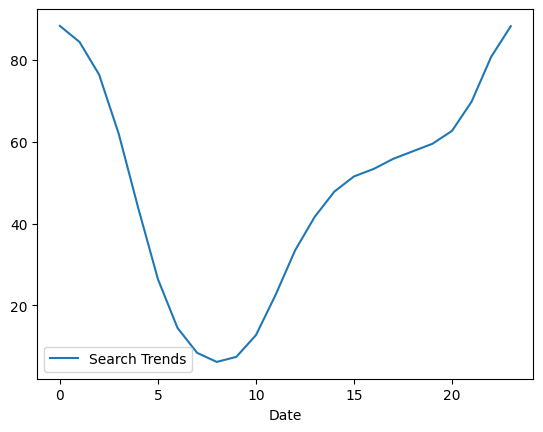

In [251]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
mean_daily_traffic = df_mercado_trends.groupby(df_mercado_trends.index.hour).mean()
mean_daily_traffic.plot()


<Axes: xlabel='day'>

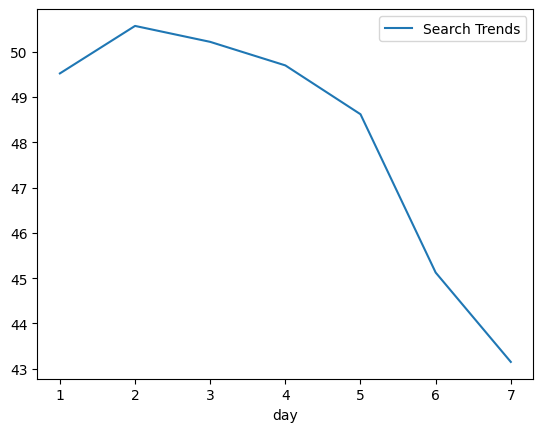

In [252]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.
mean_weekday_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().day).mean()
mean_weekday_traffic.plot()

<Axes: xlabel='week'>

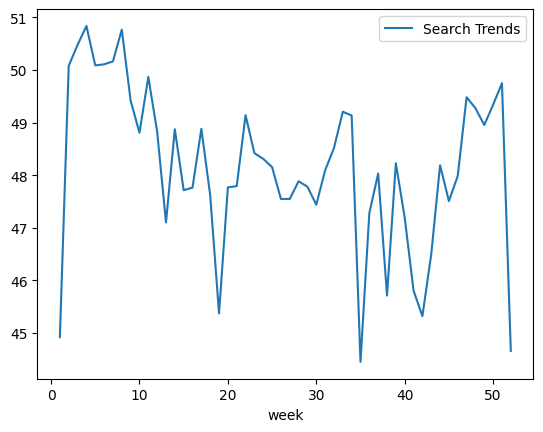

In [253]:
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`.
mean_week_traffic = df_mercado_trends.groupby(df_mercado_trends.index.isocalendar().week).mean()
mean_week_traffic.plot()



In [254]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


<Axes: xlabel='date'>

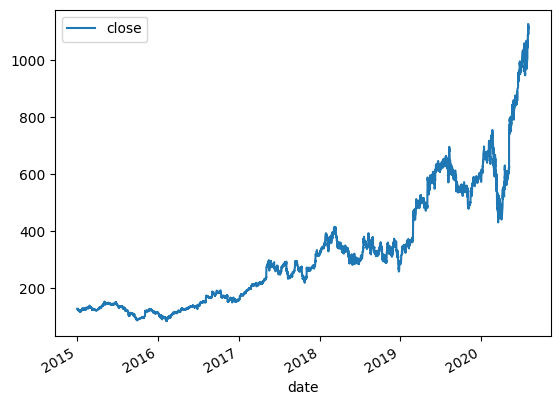

In [255]:
df_mercado_stock.plot()

In [256]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
df_mercado_stock_trends = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)
df_mercado_stock_trends = df_mercado_stock_trends.dropna(axis=0)

# View the first and last five rows of the DataFrame

In [257]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
df_first_half_2020 = df_mercado_stock_trends.loc["2020-01-01 00:00:00":"2020-06-30 23:59:59"]
df_first_half_2020

# View the first and last five rows of first_half_2020 DataFrame
df_first_half_2020.head(20)

,close,Search Trends
2020-01-02 09:00:00,601.085,9.0
2020-01-02 10:00:00,601.290,14.0
2020-01-02 11:00:00,615.410,25.0
2020-01-02 12:00:00,611.400,37.0
2020-01-02 13:00:00,611.830,50.0
2020-01-02 14:00:00,611.135,59.0
2020-01-02 15:00:00,610.200,63.0
2020-01-03 09:00:00,602.890,11.0
2020-01-03 10:00:00,603.760,16.0
2020-01-03 11:00:00,603.865,26.0


array([<Axes: >, <Axes: >], dtype=object)

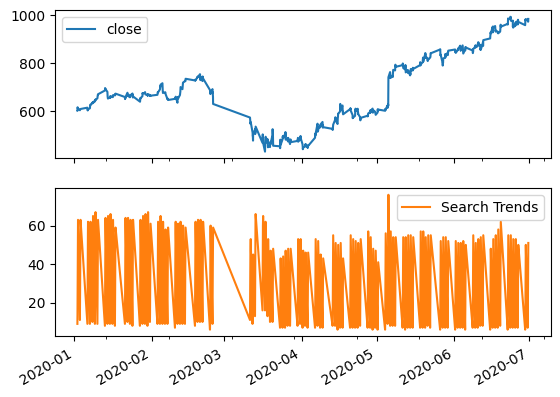

In [258]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# plot(subplots=True)`
df_first_half_2020.plot(subplots=True)

In [259]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
i=0
lagged_search_trends = []
lagged_search_trends.append(i)
lagged_search_trends[i] = 0
j=df_mercado_stock_trends.shape[0] - 1
i+=1
for ind in df_mercado_stock_trends.index:
    lagged_search_trends.append(i)
    lagged_search_trends[i] = df_mercado_stock_trends.loc[ind,"Search Trends"]
    if i==j:
      break
    i+=1

df_mercado_stock_trends['Lagged Search Trends'] = lagged_search_trends
df_mercado_stock_trends

,close,Search Trends,Lagged Search Trends
2016-06-01 09:00:00,135.160,6.0,0.0
2016-06-01 10:00:00,136.630,12.0,6.0
2016-06-01 11:00:00,136.560,22.0,12.0
2016-06-01 12:00:00,136.420,33.0,22.0
2016-06-01 13:00:00,136.100,40.0,33.0
...,...,...,...
2020-07-31 11:00:00,1105.780,20.0,11.0
2020-07-31 12:00:00,1087.925,32.0,20.0
2020-07-31 13:00:00,1095.800,41.0,32.0
2020-07-31 14:00:00,1110.650,47.0,41.0


In [260]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
'''
stand_dev_stock = [0,0,0]
stock_return =[]
closing_price = list(df_mercado_stock_trends['close'])
limit = len(closing_price)
i=0
closing_price_var = closing_price [0]
for i in range(limit):
  temp = (closing_price[i] - closing_price_var)/closing_price_var
  closing_price_var = closing_price[i]
  stock_return.append(i)
  stock_return[i] = temp

k=0
i=3
limit = len(stock_return)
while i < limit:
  stand_dev_stock.append(i)
  j=i
  k=0
  temp_list = [0,0,0,0]
  while k < 3:
    temp_list[k] = stock_return[j]
    j-=1
    k+=1
  res = stand_dev = 1
  res = np.std(temp_list)
  stand_dev_stock[i] = res
  i+=1
'''
df_mercado_stock_trends['Stock Volatility'] = df_mercado_stock_trends['close'].pct_change().rolling(window=4).std()
df_mercado_stock_trends = df_mercado_stock_trends.dropna()

#df_mercado_stock_trends['Stock Volatility'] = stand_dev_stock
df_mercado_stock_trends

,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 13:00:00,136.100,40.0,33.0,0.006134
2016-06-01 14:00:00,137.030,45.0,40.0,0.004137
2016-06-01 15:00:00,136.270,48.0,45.0,0.005257
2016-06-02 09:00:00,136.000,7.0,48.0,0.005309
2016-06-02 10:00:00,136.830,14.0,7.0,0.006091
...,...,...,...,...
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001


<Axes: >

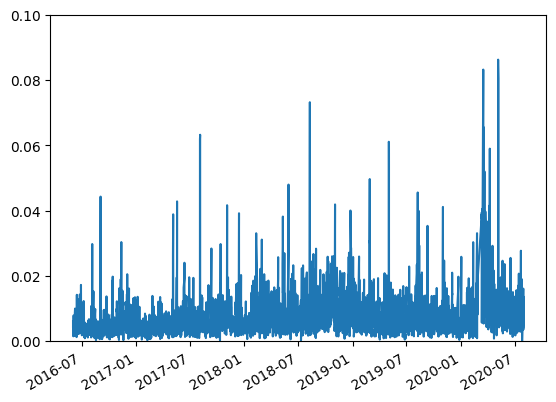

In [261]:
# Visualize the stock volatility
df_mercado_stock_trends['Stock Volatility'].plot(ylim=(0, 0.10))


In [262]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
hourly_stock_return = []
closing_price = 135.16
i=0
for ind in df_mercado_stock_trends.index:
  hourly_stock_return.append(i)
  hourly_stock_return[i] = (df_mercado_stock_trends.loc[ind, 'close'] - closing_price)/closing_price
  closing_price = df_mercado_stock_trends.loc[ind, 'close']
  i+=1

df_mercado_stock_trends['Hourly Stock Return'] = hourly_stock_return

# View the first and last five rows of the mercado_stock_trends_df DataFramec:\Users\skfot\prophet-challenge\README.md
df_mercado_stock_trends.head()
df_mercado_stock_trends.tail()


<ipython-input-262-c5f684a542c4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mercado_stock_trends['Hourly Stock Return'] = hourly_stock_return


,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2020-07-31 11:00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00,1110.650,47.0,41.0,0.013001,0.013552
2020-07-31 15:00:00,1122.510,53.0,47.0,0.013566,0.010678


In [263]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
df_mercado_stock_trends[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061386
Lagged Search Trends,-0.148938,1.000000,0.018118
Hourly Stock Return,0.061386,0.018118,1.000000


In [264]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
df_mercado_trends = df_mercado_trends.reset_index()
print(df_mercado_trends)

# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df = pd.DataFrame(columns=['ds','y'])
prophet_df['ds'] = df_mercado_trends['Date']
prophet_df['y'] = df_mercado_trends['Search Trends']

# Drop an NaN values from the prophet_df DataFrame
prophet_df.isna()

# View the first and last five rows of the mercado_prophet_df DataFrame
print(prophet_df)


                     Date  Search Trends
0     2016-06-01 00:00:00             97
1     2016-06-01 01:00:00             92
2     2016-06-01 02:00:00             76
3     2016-06-01 03:00:00             60
4     2016-06-01 04:00:00             38
...                   ...            ...
37101 2020-09-07 20:00:00             71
37102 2020-09-07 21:00:00             83
37103 2020-09-07 22:00:00             96
37104 2020-09-07 23:00:00             97
37105 2020-09-08 00:00:00             96

[37106 rows x 2 columns]
                       ds   y
0     2016-06-01 00:00:00  97
1     2016-06-01 01:00:00  92
2     2016-06-01 02:00:00  76
3     2016-06-01 03:00:00  60
4     2016-06-01 04:00:00  38
...                   ...  ..
37101 2020-09-07 20:00:00  71
37102 2020-09-07 21:00:00  83
37103 2020-09-07 22:00:00  96
37104 2020-09-07 23:00:00  97
37105 2020-09-08 00:00:00  96

[37106 rows x 2 columns]


In [265]:
# Call the Prophet function, store as an object
m = Prophet()


In [266]:
# Fit the time-series model.
m.fit(prophet_df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxw0ffa8/0hm_a_1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzxw0ffa8/dsoefcx4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87691', 'data', 'file=/tmp/tmpzxw0ffa8/0hm_a_1h.json', 'init=/tmp/tmpzxw0ffa8/dsoefcx4.json', 'output', 'file=/tmp/tmpzxw0ffa8/prophet_modelb1jtyn2c/prophet_model-20240523222746.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:27:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:28:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [267]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends_df = m.make_future_dataframe(periods=80)

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends_df.tail()

,ds
37181,2020-11-23
37182,2020-11-24
37183,2020-11-25
37184,2020-11-26
37185,2020-11-27


In [268]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends_df = m.predict(future_mercado_trends_df)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends_df[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2016-06-01 00:00:00,89.629222,81.588377,98.162826
1,2016-06-01 01:00:00,86.075935,77.142371,94.920291
2,2016-06-01 02:00:00,75.753361,67.215709,84.344156
3,2016-06-01 03:00:00,60.487045,52.368729,68.401332
4,2016-06-01 04:00:00,43.373051,35.205360,52.278296
...,...,...,...,...
37181,2020-11-23 00:00:00,83.576982,75.434179,91.496426
37182,2020-11-24 00:00:00,90.159171,82.235339,98.244268
37183,2020-11-25 00:00:00,88.887495,80.019979,96.613998
37184,2020-11-26 00:00:00,89.309689,80.322273,97.486749


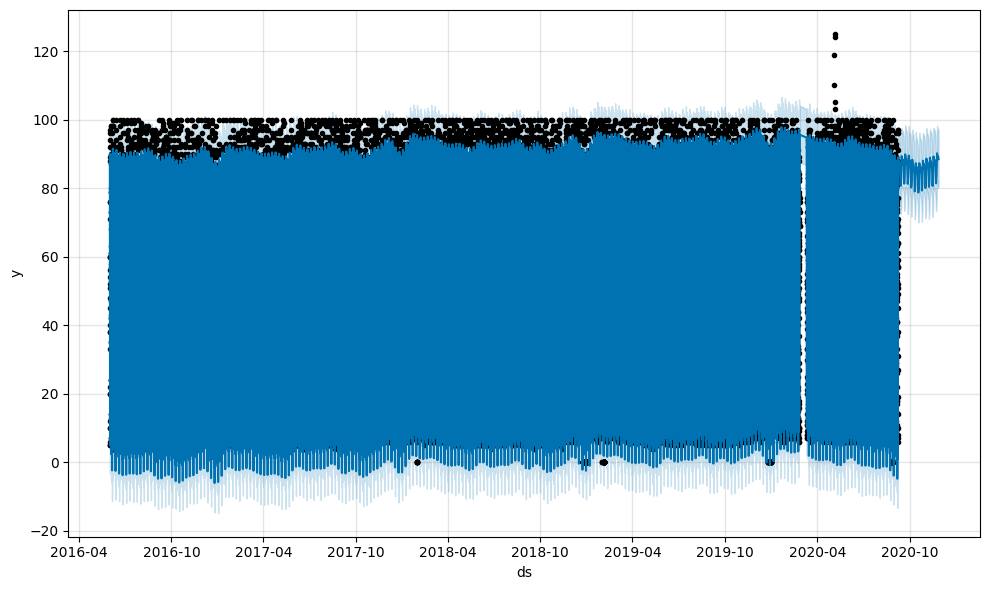

In [269]:
# Plot the Prophet predictions for the Mercado trends data
fig1 = m.plot(forecast_mercado_trends_df)

In [270]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends_df = forecast_mercado_trends_df.set_index('ds')

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends_df[['yhat', 'yhat_lower', 'yhat_upper']]

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.629222,81.588377,98.162826
2016-06-01 01:00:00,86.075935,77.142371,94.920291
2016-06-01 02:00:00,75.753361,67.215709,84.344156
2016-06-01 03:00:00,60.487045,52.368729,68.401332
2016-06-01 04:00:00,43.373051,35.205360,52.278296
...,...,...,...
2020-11-23 00:00:00,83.576982,75.434179,91.496426
2020-11-24 00:00:00,90.159171,82.235339,98.244268
2020-11-25 00:00:00,88.887495,80.019979,96.613998


<Axes: xlabel='ds'>

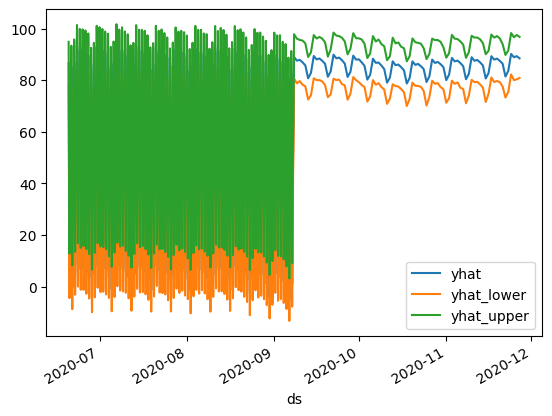

In [271]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours
forecast_mercado_trends_df[["yhat", "yhat_lower", "yhat_upper"]].iloc[-2000:,:].plot()
# fig2 = m.plot(forecast_mercado_trends_df)

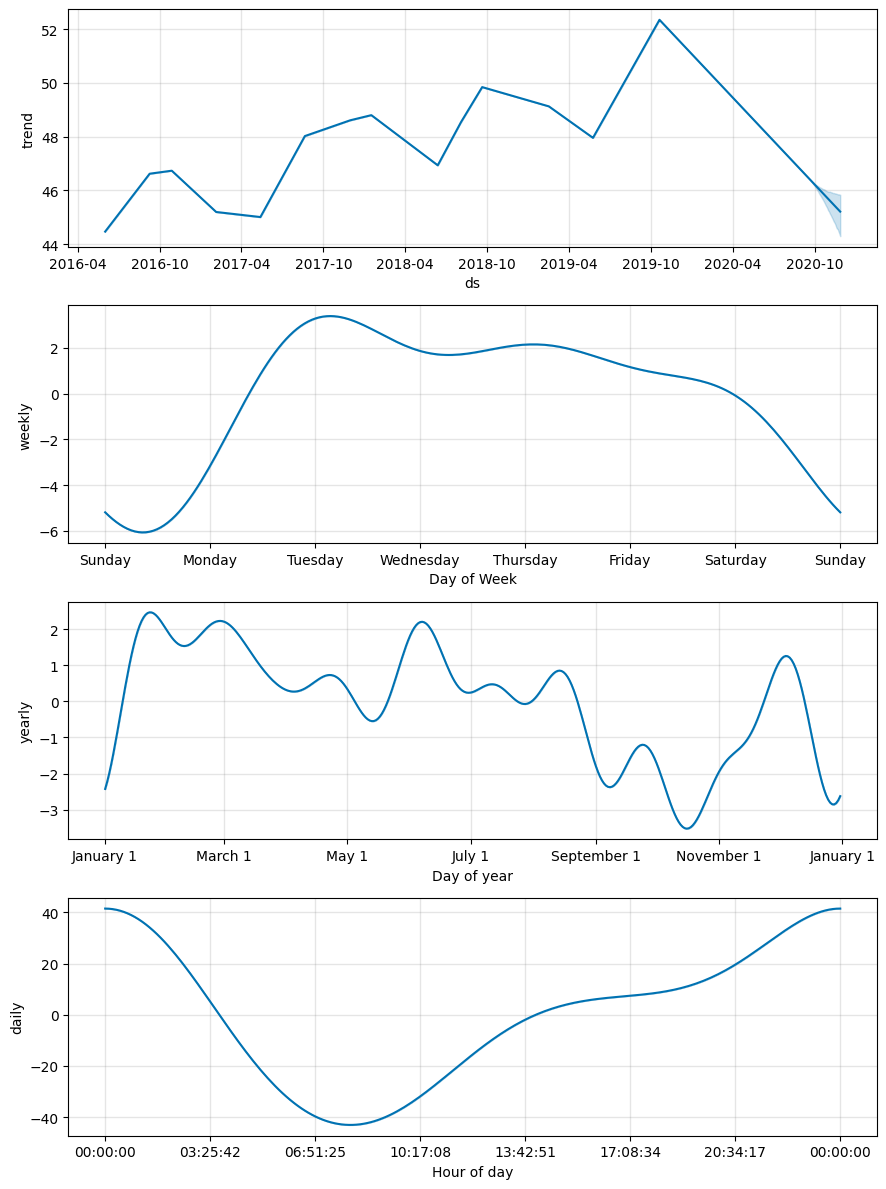

In [272]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends_df = forecast_mercado_trends_df.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
fig2 = m.plot_components(forecast_mercado_trends_df)
